In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/MauCFD/Project_1/main/project%201%20-%20Analyzing%20a%20Loyalty%20Program/Project_df.csv'
df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [3]:
df1.head()

,Client ID,Town,State,Month,Quarter,Year,Category,Distributor,Min Monthly Sales,Total Sales,Compliance,Total Points,Points Worth ($)
0,2,Tlalnepantla,Ciudad de Mexico,1,1,2018,C4,D5,59000,51951,0.88,0,0.0
1,2,Tlalnepantla,Ciudad de Mexico,2,1,2018,C4,D5,59000,15301,0.26,0,0.0
2,2,Tlalnepantla,Ciudad de Mexico,5,2,2018,C4,D5,59000,19807,0.34,0,0.0
3,2,Tlalnepantla,Ciudad de Mexico,6,2,2018,C4,D5,59000,16916,0.29,0,0.0
4,2,Tlalnepantla,Ciudad de Mexico,8,3,2018,C4,D5,59000,88353,1.50,1080,928.8


In [14]:
x = df1.iloc[:, [9,12]].values
x

array([[51951.  ,     0.  ],
       [15301.  ,     0.  ],
       [19807.  ,     0.  ],
       ...,
       [26834.  ,   147.92],
       [35671.  ,   105.78],
       [57192.  ,  4515.86]])

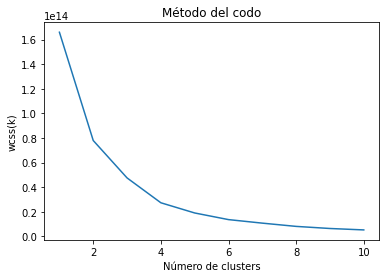

In [15]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("Método del codo")
plt.xlabel("Número de clusters")
plt.ylabel("wcss(k)")
plt.show()

In [21]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

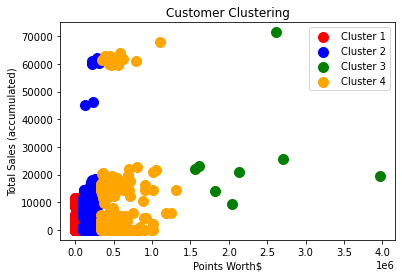

In [23]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0,1], s= 100, c= "red", label = "Cluster 1")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1,1], s= 100, c= "blue", label = "Cluster 2")
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2,1], s= 100, c= "green", label = "Cluster 3")
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3,1], s= 100, c= "orange", label = "Cluster 4")
plt.title("Customer Clustering")
plt.xlabel("Points Worth$")
plt.ylabel("Total Sales (accumulated)")
plt.legend()
plt.savefig('4Cl_totsales_pointsworth', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        metadata=None)
plt.show()                                                              

In [24]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)